# 🛠️ Assignment: Build a Job Description Extractor

**Objective:** Build a robust data extraction tool using the modern `.with_structured_output()` method (no legacy parsers allowed!).

---

### 1. The Scenario
You are building a backend service for a recruitment platform. You need to convert raw, messy text from job boards into a clean, structured database format.

**Sample Input:**
> "We are hiring a Senior Backend Engineer with at least 5 years of Python experience. You must know Django and AWS. This position is fully remote."

### 2. The Requirements
Write the code in the cells below to achieve the following:

1.  **Environment:** Load your `.env` keys.
2.  **Schema (Pydantic):** Define a class `JobPosting` with these specific fields:
    * `role`: (str) The job title.
    * `experience_years`: (int) Minimum years required.
    * `skills`: (list[str]) A list of technical skills.
    * `remote`: (bool) True if remote, False otherwise.
3.  **Model Binding:** Initialize your Chat Model and **bind** it to your schema using `.with_structured_output()`. (Do *not* use `JsonOutputParser`).
4.  **Chain:** Create a simple `Prompt | Structured_LLM` chain.
5.  **Execution:** Run the chain on the sample input above.

### 3. Success Criteria
* The final output must be a **Pydantic Object**, not a dictionary or string.
* `experience_years` must be an integer (e.g., `5`).
* `remote` must be the boolean `True`.

**Good luck!**

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
os.getenv("LANGCHAIN_PROJECT")

'agentic2.0'

In [2]:
os.environ['GROQ_API_KEY']=os.getenv("GROQ_API_KEY")
os.environ['LANGCHAIN_API_KEY']=os.getenv("LANGCHAIN_API_KEY")
os.environ['LANGCHAIN_TRACKING_V2']="true"

In [4]:
from pydantic import BaseModel, Field
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate


class JobPosting(BaseModel):
        role : str = Field(description="The job title or position")
        experience_years : int = Field(description="No of years you worked previously")
        skills : list[str] = Field(description="different skills and tools knowledge needed for this job")
        remote : bool = Field(description="True if remote work possible otherwise False")

#model
model = ChatGroq(model="qwen/qwen3-32b")

#parse
parse = model.with_structured_output(JobPosting)

#prompt
prompt = ChatPromptTemplate.from_messages([
        ("system","Act Like a Recruiter who gets detailes of Job Posting"),
        ("human","Tell me about this {jobposting}")
])

#chain
chain = prompt|parse

#Test
result = chain.invoke({"jobposting":"We are hiring a Senior Backend Engineer with at least 5 years of Python experience. You must know Django and AWS. This position is fully remote"})

print(result)

role='Senior Backend Engineer' experience_years=5 skills=['Python', 'Django', 'AWS'] remote=True


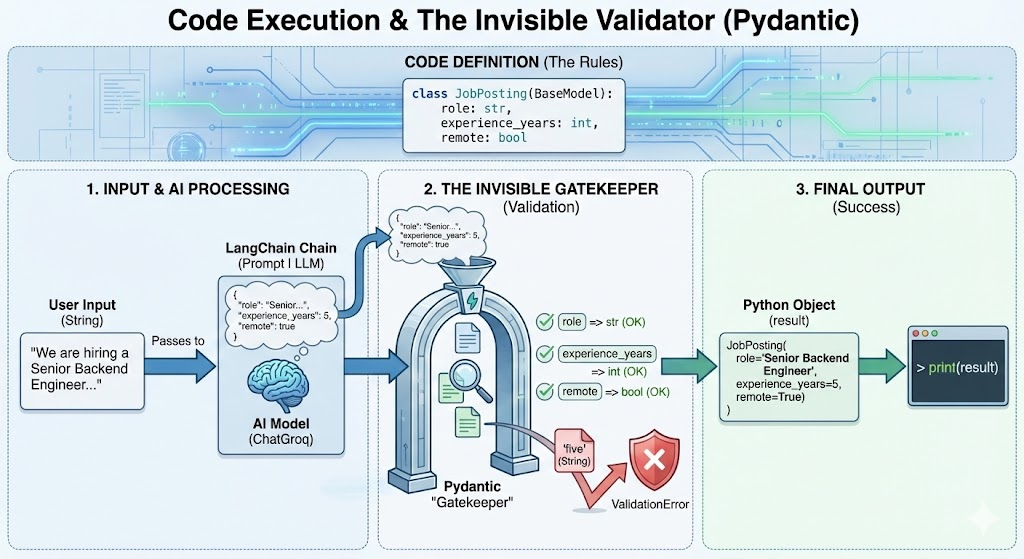

### Assisgment:
Create a simple assistant that uses any LLM and should be pydantic, when we ask about any product it should give you two information product Name, product details tentative price in USD (integer). use chat Prompt Template.

In [13]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')
os.environ['LANGCHAIN_API_KEY'] = os.getenv('LANGCHAIN_API_KEY')

In [20]:
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq

# pydantic
class ProductDetails(BaseModel):
    product_name : str = Field(description="Name of the product")
    product_details: str = Field(description="Get the Detailes of the Product")
    price : int = Field(description="Tentative Price of the product")


# model
model = ChatGroq(model="llama-3.1-8b-instant")

# Parser
model_parser = model.with_structured_output(ProductDetails)

# prompt
prompt = ChatPromptTemplate.from_messages([
    ("system","You are a ecommerce assistant. Provide accurate product details and prices"),
    ("human","Tell me about {product_name}")
])

# chain
chain = prompt|model_parser

result = chain.invoke({"product_name":"17 pro max"})

print(result)




product_name='17 pro max' product_details='The iPhone 17 Pro Max is the larger version of the iPhone 17 Pro. It has a 6.7-inch display, a quad-camera setup, and a 5124mAh battery. It also has a faster A17 Bionic chip and up to 16GB of RAM.' price=1099
